In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/hotel_bookings_numeric.csv'
df = pd.read_csv(csv_file, delimiter=',')

#print(df)
df['reservation_status_date'] = df['reservation_status_date'].apply(str)

df['reservation_status_year'] = df['reservation_status_date'].str[0:4]
df['reservation_status_month'] = df['reservation_status_date'].str[4:6]
df['reservation_status_day'] = df['reservation_status_date'].str[6:8]

df.reservation_status_year = pd.to_numeric(df.reservation_status_year, errors='coerce')
df.reservation_status_month = pd.to_numeric(df.reservation_status_month, errors='coerce')
df.reservation_status_day = pd.to_numeric(df.reservation_status_day, errors='coerce')


df = df.drop('arrival_year_week', 1)
df = df.drop('reservation_status_date', 1)


data = df.copy()
data = data.drop('agent', 1)

indexNames = data[ data['adr'] > 500 ].index

print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

print('HAY DATOS NULOS EN DATA ', data[data['adr'].isnull()])
df.to_csv("/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_numeric_normalized.csv", index=False)

v_pr = data.adr

data.pop('adr')
#v_pr = data.pop('adr')

#print('\n\nNULOS EN V_PR\n\n ', v_pr[v_pr.isnull()])
#print('data.isnull().any() ', data.isnull().any().sum())
# print('v_pr ', v_pr)

'''print('DATA SHAPE BEFORE ', data.shape)

#v_pr = data.query('adr <= 500')


data_new = data[(data["adr"] > 500)]

print('data_new ', data_new)
'''
'''
v_prueba = data_new.adr

print('\n\nV_PRUEBA\n\n', v_prueba)
data = data.drop('adr', 1)
print('DATA SHAPE AFTER', data_new.shape)
data_c2 = data.copy()
'''
# variable_objetivo = data.pop('adr')  

# data

# print(data.columns)
#print(data.shape)'''




indexNames  Int64Index([15083, 48515, 111403], dtype='int64')
HAY DATOS NULOS EN DATA  Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, total_stayed_nights, weekend_nights_proportion, reservation_status_year, reservation_status_month, reservation_status_day]
Index: []


"\nv_prueba = data_new.adr\n\nprint('\n\nV_PRUEBA\n\n', v_prueba)\ndata = data.drop('adr', 1)\nprint('DATA SHAPE AFTER', data_new.shape)\ndata_c2 = data.copy()\n"

In [2]:
from matplotlib import pyplot as plt
plt.scatter(data['weekend_nights_proportion', data['adr']])

NameError: ignored

In [ ]:
print('media antes de estandarizar\n ', data.mean(axis = 0))
print('desviacion tipica antes de estandarizar\n ',data.std(axis=0))

media antes de estandarizar
  hotel                                0.335539
is_canceled                          0.370417
lead_time                          104.013728
arrival_date_year                 2016.156558
arrival_date_month                   6.552522
arrival_date_week_number            27.165345
arrival_date_day_of_month           15.798228
stays_in_weekend_nights              0.927622
stays_in_week_nights                 2.500339
adults                               1.856408
children                             0.103889
babies                               0.007949
meal                                 1.035515
market_segment                       2.641745
distribution_channel                 1.702019
is_repeated_guest                    0.031905
previous_cancellations               0.087120
previous_bookings_not_canceled       0.137092
reserved_room_type                   0.989530
assigned_room_type                   1.339903
booking_changes                      0.221121
depo

In [ ]:
print(data.dtypes)

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                                int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                     

In [ ]:
# standarize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_transformed = scaler.fit_transform(data)
print(data_transformed.shape)

(119387, 32)


In [ ]:

# data = pd.DataFrame(data_transformed, index = data.index, columns = data.columns)


data = pd.DataFrame(data_transformed, index=range(data_transformed.shape[0]),
                          columns=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces','total_of_special_requests', 'reservation_status', 'total_stayed_nights', 'weekend_nights_proportion', 'reservation_status_year','reservation_status_month', 'reservation_status_day' ])

'''print(data_transformed.shape[0])
print(data_transformed.shape[1])'''

print(data)


           hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights    adults  children   babies      meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  customer_type  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day
0       1.407224    -0.767042   2.227023          -1.634781            0.144785                 -0.012153                  -1.685286                -0.928912             -1.310253  0.247888 -0.260662 -0.08158 -0.071661       -1.514987             -2.497822          -0.181538               -0.103181                        -0.09155            0.595344          

   hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  customer_type  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day
0      1            0        342               2015                   7                        27                          1                        0                     0       2         0       0     1               0                     0                  0                       0                               0                   2                   2                3   

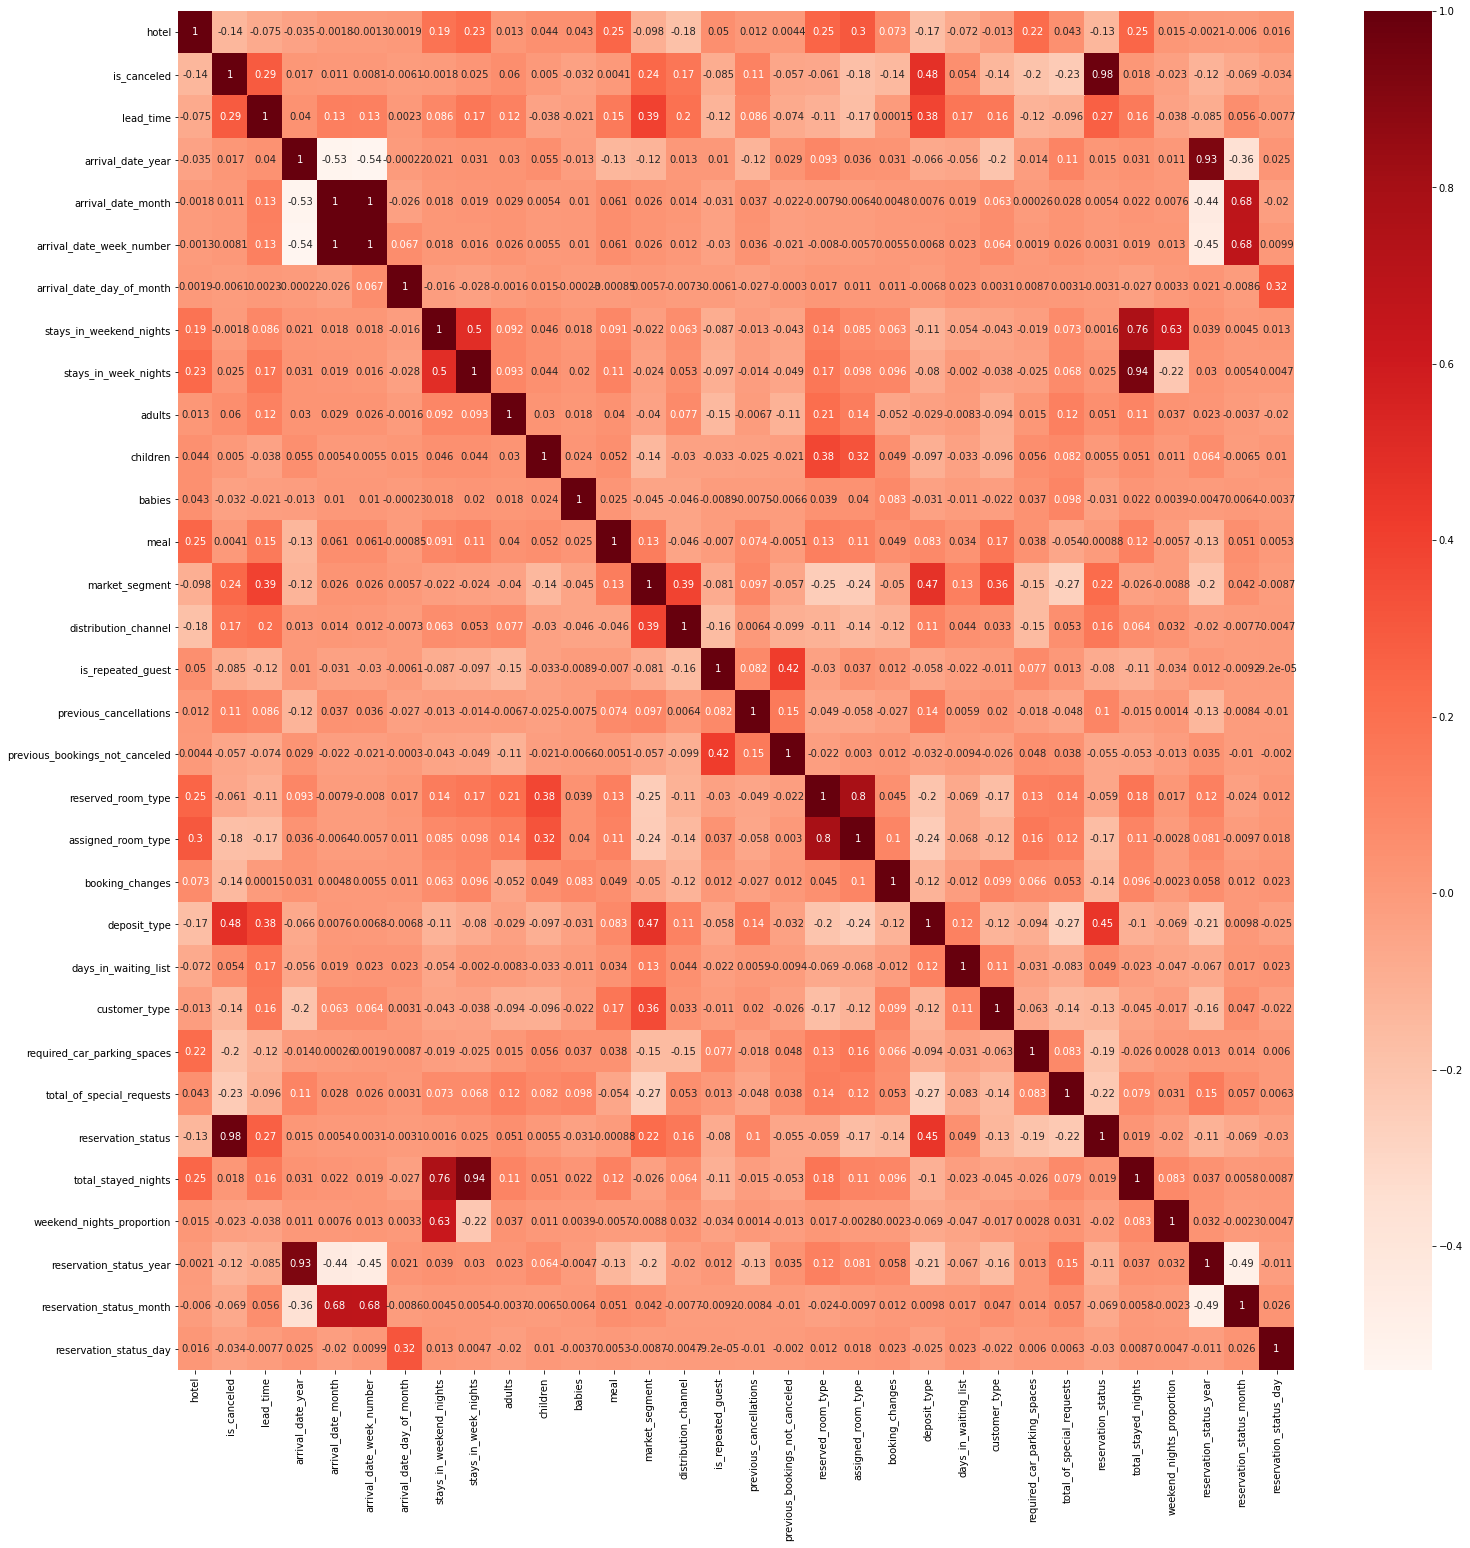

In [ ]:
# Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(25,25))
print(data_c2.head(10))
cor = data_c2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# seleccion de caracteristicas


#cor_target = abs(cor["adr"])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target > 0.3]
#relevant_features

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
X = data



y = v_pr



print(X.shape)
print(y.shape)

(119387, 32)
(119387,)


In [ ]:
print(data[["reserved_room_type","children"]].corr())

                    reserved_room_type  children
reserved_room_type            1.000000  0.378062
children                      0.378062  1.000000


In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
#X_1 = sm.add_constant(X)
#Fitting sm.OLS model
#model = sm.OLS(y,X_1).fit()
#model.pvalues

In [ ]:
#Backward Elimination
'''
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.0001):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
'''

'\ncols = list(X.columns)\npmax = 1\nwhile (len(cols)>0):\n    p= []\n    X_1 = X[cols]\n    X_1 = sm.add_constant(X_1)\n    model = sm.OLS(y,X_1).fit()\n    p = pd.Series(model.pvalues.values[1:],index = cols)      \n    pmax = max(p)\n    feature_with_p_max = p.idxmax()\n    if(pmax>0.0001):\n        cols.remove(feature_with_p_max)\n    else:\n        break\nselected_features_BE = cols\nprint(selected_features_BE)\n'

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True False False  True False
 False False False False False False  True False False False False False
 False False False False False False False False]
[ 4 12  9  1  1  1  1  1  3  7  1 25  6  5 15 10 22 20  1  8 21 16 23 26
 18 17 13  2 14 11 19 24]


In [ ]:
print(data.shape)

(119387, 32)


In [ ]:
#no of features
nof_list=np.arange(1,32)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 29
Score with 29 features: 0.424931


In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'reserved_room_type', 'total_stayed_nights'], dtype='object')


In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297790.08746270835, tolerance: 19129.75836415127
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531574.1261428744, tolerance: 19129.75836415127
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145605.70307572186, tolerance: 19839.718150113367
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to inc

Best alpha using built-in LassoCV: 0.185058
Best score using built-in LassoCV: 0.418091


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 26 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

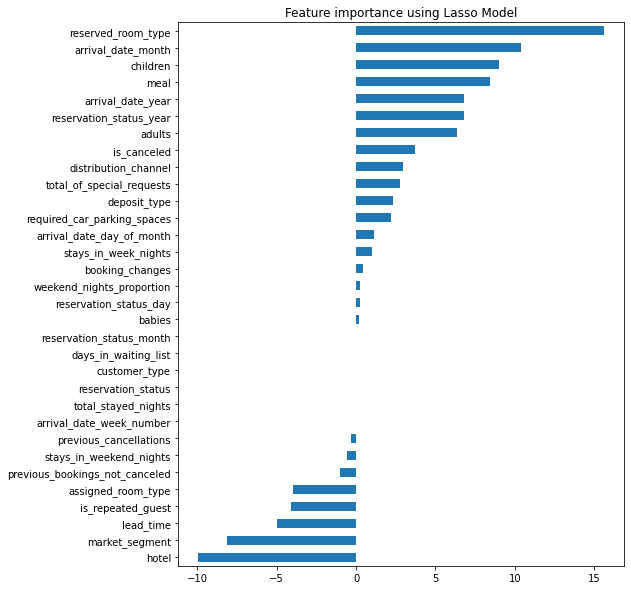

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [ ]:
# regresion simple

# Usar una variable independiente: reserved_room_type


regresor_lineal_simple = data[['reserved_room_type']]

regresor_lineal_simple['adr'] =  v_pr

regresor_lineal_simple.dropna(axis=0, inplace=True)
print(regresor_lineal_simple[regresor_lineal_simple['adr'].isnull()])

target = regresor_lineal_simple.pop('adr')
print(target.shape)
print(regresor_lineal_simple)


Empty DataFrame
Columns: [reserved_room_type, adr]
Index: []
(119384,)
        reserved_room_type
0                 0.595344
1                 0.595344
2                -0.583006
3                -0.583006
4                -0.583006
...                    ...
119382           -0.583006
119383            1.773693
119384            1.184518
119385           -0.583006
119386           -0.583006

[119384 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# fit a model
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(regresor_lineal_simple, target)

X_train.dropna(axis=0, inplace=True)
y_train.dropna(axis=0, inplace=True)

print(X_train.isnull().values.sum())
print(X_test.isnull().values.sum())

print(y_train.isnull().values.sum())
print(y_test.isnull().values.sum())

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

predictions[0:5]


0
0
0
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([ 97.01146924, 121.21457756,  97.01146924, 111.53333423,
        97.01146924])

Text(0, 0.5, 'Predictions')

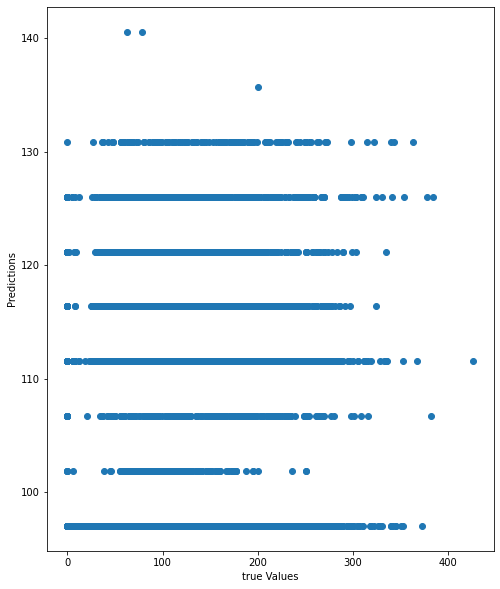

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

In [ ]:
print('\n\nX_test\n\n',X_test, '\n\ny_test\n\n',y_test)

In [ ]:
print ('Score:', model.score(X_test, y_test))


Score: 0.028061641517185487


In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, regresor_lineal_simple, target, cv=6)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(model, regresor_lineal_simple, target, cv=6)
plt.scatter(y, predictions)

In [ ]:
data_best_features = data[['reserved_room_type','arrival_date_month', 'children', 'meal', 'arrival_date_year', 'adults']]

X_train, X_test, y_train, y_test = train_test_split(data_best_features, variable_objetivo)

In [ ]:
from sklearn import datasets
import pandas as pd

# data_best_features
# y
data_v_obj = df['adr']


X_train, X_test, y_train, y_test = train_test_split(data_best_features, data_v_obj, test_size=0.2)


print('\n\nDATA_BEST_FEATURES\n\n ', data_best_features)
print('\n\nDATA_V_OBJ\n\n ', data_v_obj)

In [ ]:
'''models = []
models.append(('SR', LinearRegression()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)'''

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_c2 = scaler.fit_transform(data_c2)
print(data_c2.shape)

In [ ]:
data_c2 = pd.DataFrame(data_c2, index=range(data_c2.shape[0]),
                          columns=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces','total_of_special_requests', 'reservation_status', 'total_stayed_nights', 'weekend_nights_proportion', 'reservation_status_year','reservation_status_month', 'reservation_status_day' ])

'''print(data_transformed.shape[0])
print(data_transformed.shape[1])'''

print(data_c2)

In [ ]:
# Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(25,25))
print(data_c2.head(10))
cor2 = data_c2.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# seleccion de caracteristicas


cor_target = abs(cor2["adr"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.3]
relevant_features